In [54]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy.linalg as sp

from MRPy import MRPy

In [84]:
#ler arquivo de dados para montar a Matriz H retirada do modelo no Ftool
lines = np.loadtxt("result.txt", delimiter=",", unpack=True)
H = np.array(lines)


In [83]:
#Montagem da matriz de massa

s=np.shape(H)
M=np.array(np.zeros(s));
m=700;


gl=np.int(np.sqrt(np.size(H)))
print(gl)

for i in range(0, gl):
    M [i,i] = m
    


13


In [82]:
#Cálculo dos autovalores e vetores da matriz dinâmica e vetor de frequência modal
D = np.dot(H,M)
w2,phi=sp.eig(D)


#Ordenar autovalores e vetores
iw   = w2.argsort()
w2  = w2[iw]
phi = phi[:,iw]

fn = [ ]
w=4*np.pi*np.pi
for i in range(0, gl):
    fn.append(np.sqrt(1/(w*w2[i])))
    


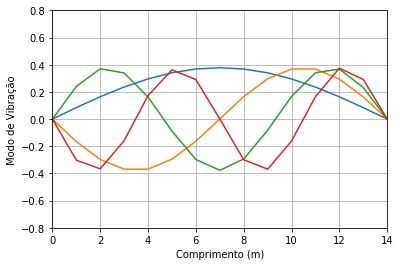

In [85]:
#4 primeiros modos de vibração 

l=14 #comprimento da estrutura
L=np.linspace(0,l,l+1)
g=(gl,l+1)
modo=np.zeros(g)
modo1=np.matrix.transpose(phi)


for i in range(0, gl):
    for j in range(0,gl):
        modo[i,j+1]=modo1[i,j]

#print(modo)
        
for i in range(0, 4): 
    
    plt.plot(L, modo[l-i-2,:])
    
plt.xlim(0, max(L));        plt.xlabel('Comprimento (m)') 
plt.ylim(-0.8, 0.8);   plt.ylabel('Modo de Vibração') 
plt.grid(True) 

In [91]:
#Impacto de força aleatória e velocidade inicial
td=[ ]
vo=[ ]
for i in range(0, gl):
    td.append(1/fn[i])
    Fo = 50000 #newtons

p=0
tmin = min(td)

for i in range(0, gl):
    if td[i] == tmin:
        p=i
teta = np.pi/2


for i in range(0, gl):
    if i == p:
        vo.append(Fo*td[i]/m)
    else:
        vo.append(0)

In [92]:
#alfa=vetor phi transposto (modo1) * matriz de massa * vetor velocidade transposto*-1
#beta=omega 1 * sen(-teta) * matriz de massa em i
alfa=[ ]
beta=[ ]
for i in range(0, gl):
    alfa.append(np.dot(np.dot(modo1[i,:],M),np.transpose(vo)*-1))
    beta.append(np.sin(-teta)*fn[i]*2*np.pi*m)

/home/amaurice/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:12: ComplexWarning: Casting complex values to real discards the imaginary part
  if sys.path[0] == '':


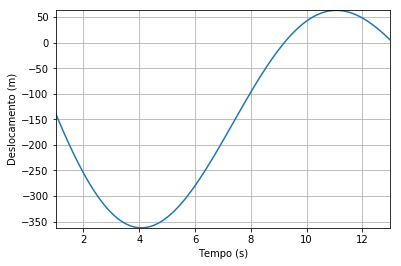

In [103]:
#Umax para cada modo
umax = [ ]
tmin=min(td)
for i in range(0, gl):
    umax.append(-alfa[i]/beta[i])

#Equação do deslocamento para cada modo
h=(gl,100)
uk= np.zeros((gl,100))
t=np.linspace(1,gl,100);
for i in range(0, gl):
        uk[i,:]=umax[p]*np.cos(2*np.pi*fn[i]*t-teta); 
    

#U(t) = phi * uk, onde a soma dos termos de cada coluna resulta no deslocamento no instante representado na coluna    
U1 = np.dot(phi,uk)
U = [ ]
for i in range(0,np.size(t)):
    U.append(np.sum(uk[:,i]))

#Plotar resultados do deslocamento total para o impulso adotado
plt.plot(t, U)
plt.xlim(1, max(t));        plt.xlabel('Tempo (s)') 
plt.ylim(min(U), max(U));   plt.ylabel('Deslocamento (m)') 
plt.grid(True)